In [27]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np

from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
%matplotlib widget
# %matplotlib inline

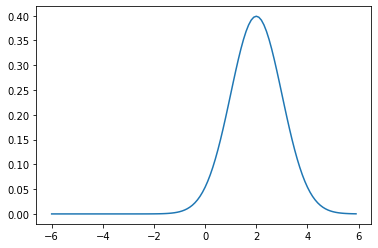

In [11]:
x = np.arange(-6, 6, 0.1) # x from -6 to 6 in steps of 0.1
y = 1 / np.sqrt(2 * np.pi) * np.exp( - (x-2)**2 / 2.)
plt.plot(x, y)

In [38]:
# x = np.linspace(0, 2 * np.pi)
fig2 = plt.figure( figsize= (5,1) )
ax1 = fig2.add_subplot(2, 1, 1)

ax2 = fig2.add_subplot(2 , 1, 2 , projection = "3d" )
# line, = ax.plot(x, np.sin(x))


x_max = y_max = 100
x_min = y_min = 0
xx = np.arange( x_min , x_max )
yy = np.arange( y_min , y_max )

ax1.set_ylim( 0 , 0.5 )
ax1.set_title( "gaussian x coordinate view" )
ax1.set_xlabel( "$X$" )
line1 , = ax1.plot( xx , np.zeros(x_max-x_min) )

# ax2.set_xlim( x_min , x_max )
# ax2.set_ylim( y_min , y_max )
# ax2.set_aspect( "equal" )


x2d, y2d = np.meshgrid(xx, yy)

sigma = 1

@interact(  )
def test( x = widgets.IntSlider( min = x_min+6 , max = x_max-6 , value = (x_max-x_min)/2 ) 
         , y = widgets.IntSlider( min = y_min+6 , max = y_max-6 , value = (y_max-y_min)/2 )
        ) :
    
    out1 = 1 / np.sqrt(2 * np.pi) * np.exp(- (xx-x)** 2 / 2.)
    line1.set_ydata( out1 )
    
    kernel_2d = np.exp(-( (x2d-x)**2 + (y2d-y)** 2) / (2 * sigma ** 2))
    kernel_2d = kernel_2d / (2 * np.pi * sigma ** 2) # unit integral
    ax2.clear()
    ax2.plot_surface(x2d, y2d, kernel_2d ,
#                        , rstride=3, cstride=3, linewidth=1, antialiased=True,
#                         cmap=cm.viridis
                      )
    ax2.set_xlabel( "$X$" )
    ax2.set_ylabel( "$Y$" )
    plt.show( kernel_2d )
    


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(IntSlider(value=50, description='x', max=94, min=6), IntSlider(value=50, description='y'…